In [74]:
%matplotlib inline
from matplotlib.pyplot import figure, gcf

In [80]:
def graficar(xs, ys, cursores_x={}, cursores_y={}, tamaño=(9, 6), imprimir_etiquetas=True, archivo=""):
    
    def imprimir_cursores(cursores, margenes, eje, axis, δ):
        etiquetas = cursores.keys()
        if eje is "x":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([valor, valor], [margenes[0], margenes[1]], '--r')
                axis.text(valor, -δ, etiqueta, color='red')
        if eje is "y":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([margenes[0], margenes[1]], [valor, valor], '--r')
                axis.text(-10*δ, valor, etiqueta, horizontalalignment="right", color='red')
                
    from matplotlib.pyplot import figure
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Noto Sans'], 'size':16.0})
    #rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    #rc('text', usetex=True)
    
    δx = 0.01*abs(max(xs) - min(xs))
    δy = 0.01*abs(max(ys) - min(ys))
    
    margenes_x = [min(xs) - δx, max(xs) + δx]
    margenes_y = [min(ys) - δy, max(ys) + δy]
    
    fig = figure(figsize=tamaño)
    fig.tight_layout()
    ax = fig.gca()

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["right"].set_color("none")
    ax.tick_params(top=False, right=False)

    ax.axes.spines["left"].set_position("zero")
    #ax.axes.spines["left"].set_axisline_style("->")
    ax.axes.spines["bottom"].set_position("zero")
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.plot(xs, ys, 'k')
    ax.axes.set_xlim(margenes_x[0], margenes_x[1])
    ax.axes.set_ylim(margenes_y[0], margenes_y[1])
    fig.canvas.draw()
    
    #for direction in ["xzero", "yzero"]:
    #    ax.axis[direction].set_visible(True)
    #    ax.axis[direction].set_axisline_style("->")
    
    if imprimir_etiquetas == False:
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
    if len(cursores_x) > 0:
        imprimir_cursores(cursores_x, margenes_y, "x", ax, δx)
    if len(cursores_y) > 0:
        imprimir_cursores(cursores_y, margenes_x, "y", ax, δy)

    labels = ax.xaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)

    labels = ax.yaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)
            
    if len(archivo) > 0:
        fig.savefig(archivo, transparent=True)
    return ax

In [81]:
from control import tf, step
from numpy import linspace

In [137]:
G = tf([1],[1, 3, 2])
t = linspace(0, 10, 100)
y, t = step(G, t)

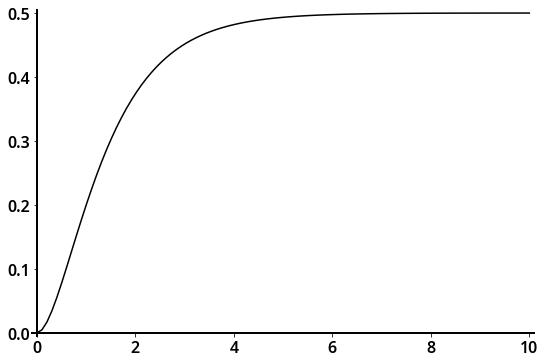

In [138]:
ax2 = graficar(t, y, archivo="oscila.png")
ax2.plot([-1, 11], [1, 1], "--r");
f = gcf()
f.savefig("oscila.png", transparent=True)

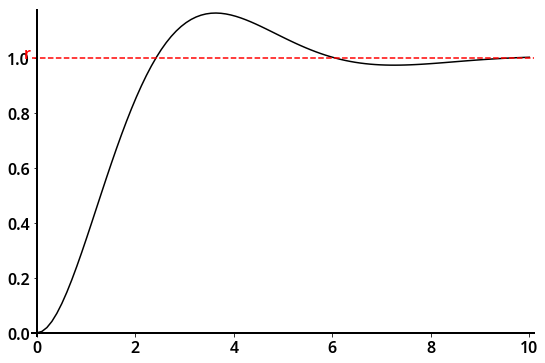

In [48]:
ax2 = graficar(y, t, cursores_y={r"r":1})

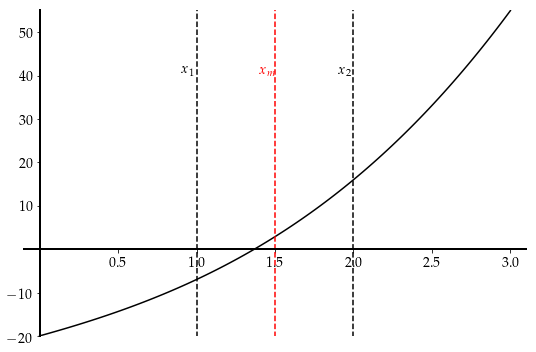

In [36]:
f = lambda x: x**3 + 2*x**2 + 10*x - 20

xs = linspace(0, 3, 100)
ys = f(xs)

ax1 = graficar(xs, ys)
ax1.plot([1, 1], [-1000, 1000], '--k')
ax1.plot([2, 2], [-1000, 1000], '--k')
ax1.plot([1.5, 1.5], [-1000, 1000], '--r')
ax1.text(0.9, 40, r'$x_1$')
ax1.text(1.9, 40, r'$x_2$')
ax1.text(1.4, 40, r'$x_m$', color='red');

In [37]:
tam=(6, 6)
tls=True

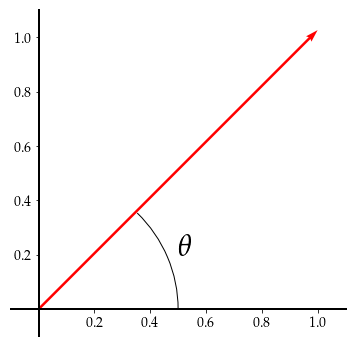

In [39]:
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

fig = figure(figsize=tam)
ax = fig.gca()

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top="off", right="off")

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

#ax.plot(xs, ys, 'k')
ax.axes.set_xlim(-0.1, 1 + 0.1)
ax.axes.set_ylim(-0.1, 1 + 0.1)

elpse = Arc([0, 0], 1, 1, 0, 0, 45)
ax.add_patch(elpse)

ax.quiver([0], [0], [1], [1], scale=1.2, color="r");
#ax.quiver?

fig.canvas.draw()
if tls == False:
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

labels = ax.xaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)

labels = ax.yaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)
        
ax.text(0.5, 0.2, r'$\theta$', size=30);

In [40]:
prueba = {r"$x_i$":1}
p = prueba.keys()

In [41]:
for c in p:
    print(c, prueba[c])

$x_i$ 1


In [15]:
len(prueba)

1

In [12]:
%matplotlib inline

ValueError: v must contain [xmin xmax ymin ymax]

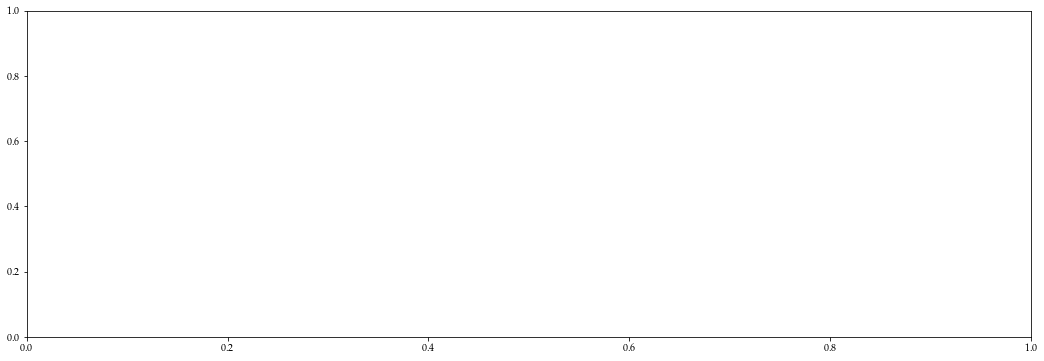

In [31]:
fig = figure(figsize=(18,6))
ax = fig.gca()
ax.axis(["xzero"])